In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_style("whitegrid")

In [2]:
def make3(init):
    return [init + 3*i for i in range(10)]

# 使用惠斯通电桥测量铜电阻

In [3]:
def b_bridge(Us, R1, R2, _R3_l, _t_l):
    alpha_0 = 0.00428
    K = R1 / R2
    R3_l = np.array(_R3_l)
    Rx_l = R3_l * K
    t_l = np.array(_t_l)
    item_list = [t_l, R3_l, Rx_l]
    item_name = ['温度', 'R_3测量值', 'R_x计算值']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list:
            print("%.2f" % ll[i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['figure.dpi'] = 144
    plt.scatter(t_l, Rx_l, color='black')
    A = np.vstack([t_l, np.ones(len(t_l))]).T
    m, c = np.linalg.lstsq(A, np.array(Rx_l), rcond=1)[0]
    alpha = m / c
    print("R = %.4ft + %.3f" % (m, c))
    print("R = %.3f * (1 + %ft)" % (c, alpha))
    print("不确定度 U_alpha = %.1f%%" % ((np.abs(alpha - alpha_0) * 100 / alpha_0)))
    plt.plot(t_l, m * t_l + c, linewidth=2, color='black', linestyle='--')

**请将数据放入字典对象`b_data`中**

参数解释:
1. `Us` :平衡电压
2. `R1` : R1阻值
3. `R2` : R2阻值
4. `_R3_l` : R3测量值数列
5. `_t_l` : 温度T测量值数列,温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`


数据	温度	    R_3测量值	    R_x计算值	    
---------------------------------------------------------------------------------------------------------------
#0	27.40	    560.10	    560.10	    
#1	30.40	    566.30	    566.30	    
#2	33.40	    573.00	    573.00	    
#3	36.40	    579.60	    579.60	    
#4	39.40	    585.90	    585.90	    
#5	42.40	    592.00	    592.00	    
#6	45.40	    598.40	    598.40	    
#7	48.40	    604.90	    604.90	    
#8	51.40	    611.10	    611.10	    
#9	54.40	    617.40	    617.40	    
---------------------------------------------------------------------------------------------------------------
R = 2.1238t + 502.005
R = 502.005 * (1 + 0.004231t)
不确定度 U_alpha = 1.2%


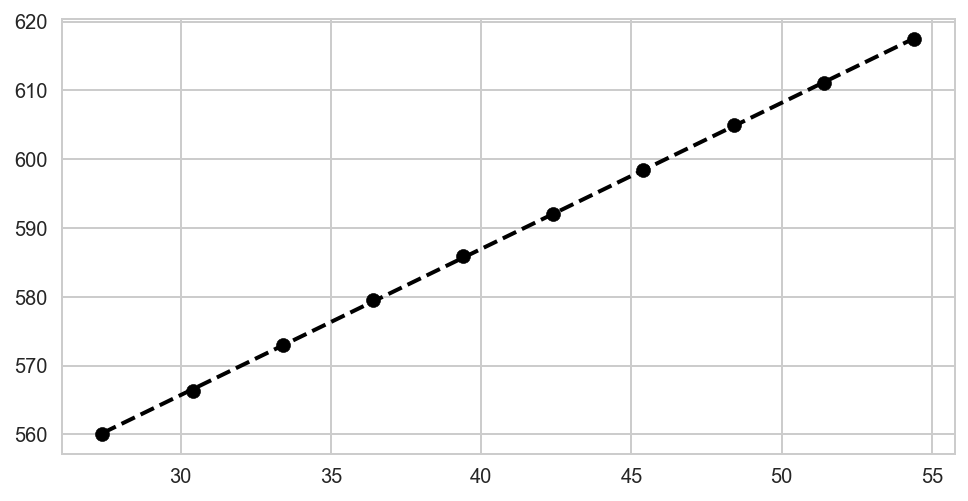

In [4]:
b_data = {
    'Us'    : 5, 
    'R1'    : 100,
    'R2'    : 100,
    '_R3_l' : [560.1,566.3,573.0,579.6,585.9,592.0,598.4,604.9,611.1,617.4], 
    '_t_l'  : make3(27.4)
}
b_bridge(**b_data)

# 使用卧式电桥测量铜电阻

In [5]:
def l_bridge(Us, R2, R3, R1_0, _t_l, _U_l):
    alpha_0 = 0.00428
    t_l = np.array(_t_l)
    U_l = np.array(_U_l)
    d_Rx = 4 * R1_0 * U_l * 10**-3 / Us
    Rx_l = np.round(R1_0 + d_Rx, 2)
    item_list = [t_l, U_l, d_Rx, Rx_l]
    item_name = ['温度', '电压测量值', 'delta_R_x', 'R_x计算值']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list:
            print("%.2f" % ll[i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['figure.dpi'] = 144
    plt.scatter(t_l, Rx_l, color='black')
    A = np.vstack([t_l, np.ones(len(t_l))]).T
    m, c = np.linalg.lstsq(A, np.array(Rx_l), rcond=1)[0]
    alpha = m / c
    print("R = %.4ft + %.3f" % (m, c))
    print("R = %.3f * (1 + %ft)" % (c, alpha))
    print("R_0 = %.3f, alpha = %f" % (c, alpha))
    print("不确定度 U_alpha = %.1f%%" % ((np.abs(alpha - alpha_0) * 100 / alpha_0)))
    plt.plot(t_l, m * t_l + c, linewidth=2, color='black', linestyle='--')

**请将数据放入字典对象`l_data`中**

参数解释:
1. `Us` :平衡电压
2. `R2` : R2阻值
3. `R3` : R3阻值
4. `R1_0` : R1初始测量值
5. `_t_l` : 温度T测量值数列,温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`
6. `_U_l` : 电压测量值数列


数据	温度	    电压测量值	    delta_R_x	    R_x计算值	    
---------------------------------------------------------------------------------------------------------------
#0	31.00	    0.00	    0.00	    56.30	    
#1	34.00	    2.30	    0.40	    56.70	    
#2	37.00	    5.00	    0.87	    57.17	    
#3	40.00	    8.40	    1.46	    57.76	    
#4	43.00	    11.90	    2.06	    58.36	    
#5	46.00	    17.50	    3.03	    59.33	    
#6	49.00	    20.20	    3.50	    59.80	    
#7	52.00	    23.50	    4.07	    60.37	    
#8	55.00	    27.70	    4.80	    61.10	    
#9	58.00	    32.00	    5.54	    61.84	    
---------------------------------------------------------------------------------------------------------------
R = 0.2096t + 49.546
R = 49.546 * (1 + 0.004230t)
R_0 = 49.546, alpha = 0.004230
不确定度 U_alpha = 1.2%


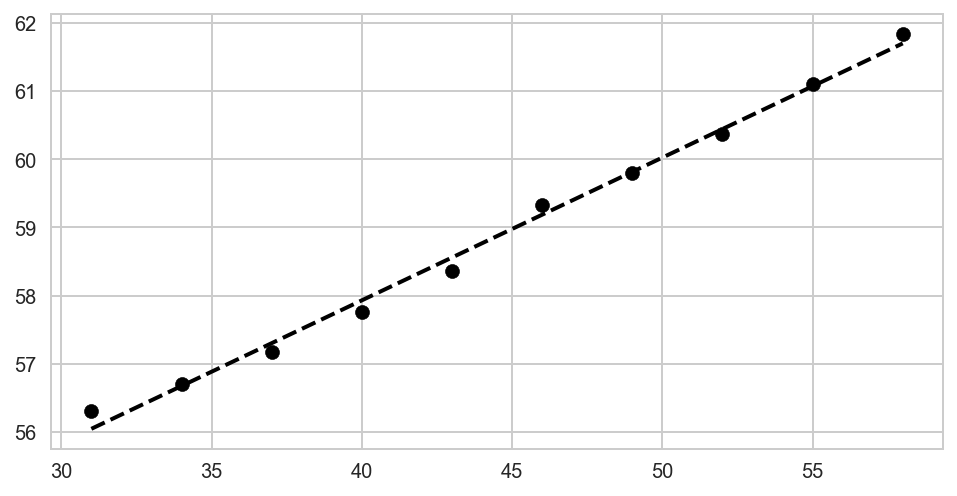

In [6]:
l_data = {
    'Us'   : 1.3,
    'R2'   : 50,
    'R3'   : 50,
    'R1_0' : 56.30,
    '_t_l' : make3(31.0),
    '_U_l' : [0,2.3,5.0,8.4,11.9,17.5,20.2,23.5,27.7,32.0]
}
l_bridge(**l_data)

# 使用立式电桥测量热敏电阻

In [7]:
def s_bridge(Us, R1, R2, R3_0, _t_l, _U_l):
    t_l = np.array(_t_l)
    U_l = np.array(_U_l)
    R_ = R1
    R = R3_0
    d_Rx = ((R+R_)**2 * U_l * 10**-3) / (R_*Us - (R+R_)*U_l*10**-3)
    Rx_l = np.round(R3_0 + d_Rx, 2)
    tr_Rx_l = np.log(Rx_l)
    T_l = t_l + 273
    tr_T_l = 1 / T_l
    item_list = [t_l, U_l, d_Rx, Rx_l, T_l, tr_Rx_l, tr_T_l]
    item_name = ['温度', '电压测量值', 'delta_R_x', 'R_x计算值','T(=t+273)', 'ln(R_x)', '1/T']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list[:-2]:
            print("%.2f" % ll[i], end='\t    ')
        print("%.4f" % item_list[-2][i], end='\t    ')
        print("%.6f" % item_list[-1][i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.rcParams['figure.dpi'] = 144
    plt.subplot(211)
    plt.scatter(T_l, Rx_l, color='black')
    plt.plot(T_l, Rx_l, color='black', linestyle='-')
    plt.subplot(212)
    L = tr_T_l.min()
    H = tr_T_l.max()
    d = (H - L) / 10
    plt.xlim(L - d, H + d)
    plt.scatter(tr_T_l, tr_Rx_l, color='black')
    A = np.vstack([tr_T_l, np.ones(len(tr_T_l))]).T
    m, c = np.linalg.lstsq(A, np.array(tr_Rx_l), rcond=1)[0]
    plt.plot(tr_T_l, m * tr_T_l + c, linewidth=2, color='black', linestyle='--')
    print("ln(R_x) = %.1f * (1/T) + (%.4f)" % (m, c))
    R_0 = np.exp(c)
    B_n = m
    print("R_x = R_0 * e^(B_n/T) = %.3f * e^(%.1f/T)" % (R_0, B_n))
    print("R_0 = %.3f, B_n = %.1f" % (R_0, B_n))

**请将数据放入字典对象`l_data`中**

参数解释:
1. `Us` :平衡电压
2. `R1` : R1阻值
3. `R2` : R2阻值
4. `R3_0` : R3初始测量值
5. `_t_l` : 温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`
6. `_U_l` : 电压测量值数列


数据	温度	    电压测量值	    delta_R_x	    R_x计算值	    T(=t+273)	    ln(R_x)	    1/T	    
---------------------------------------------------------------------------------------------------------------
#0	34.00	    0.00	    0.00	    2004.00	    307.00	    7.6029	    0.003257	    
#1	37.00	    -5.40	    -169.10	    1834.90	    310.00	    7.5147	    0.003226	    
#2	40.00	    -12.00	    -342.17	    1661.83	    313.00	    7.4157	    0.003195	    
#3	43.00	    -19.40	    -502.76	    1501.24	    316.00	    7.3140	    0.003165	    
#4	46.00	    -27.10	    -641.47	    1362.53	    319.00	    7.2171	    0.003135	    
#5	49.00	    -35.50	    -767.75	    1236.25	    322.00	    7.1198	    0.003106	    
#6	52.00	    -44.50	    -880.90	    1123.10	    325.00	    7.0238	    0.003077	    
#7	55.00	    -54.20	    -983.19	    1020.81	    328.00	    6.9284	    0.003049	    
#8	58.00	    -64.40	    -1073.78	    930.22	    331.00	    6.8354	    0.003021	    
#9	61.00	    -75.10	    -1154.31	    849.69	    334.00	   

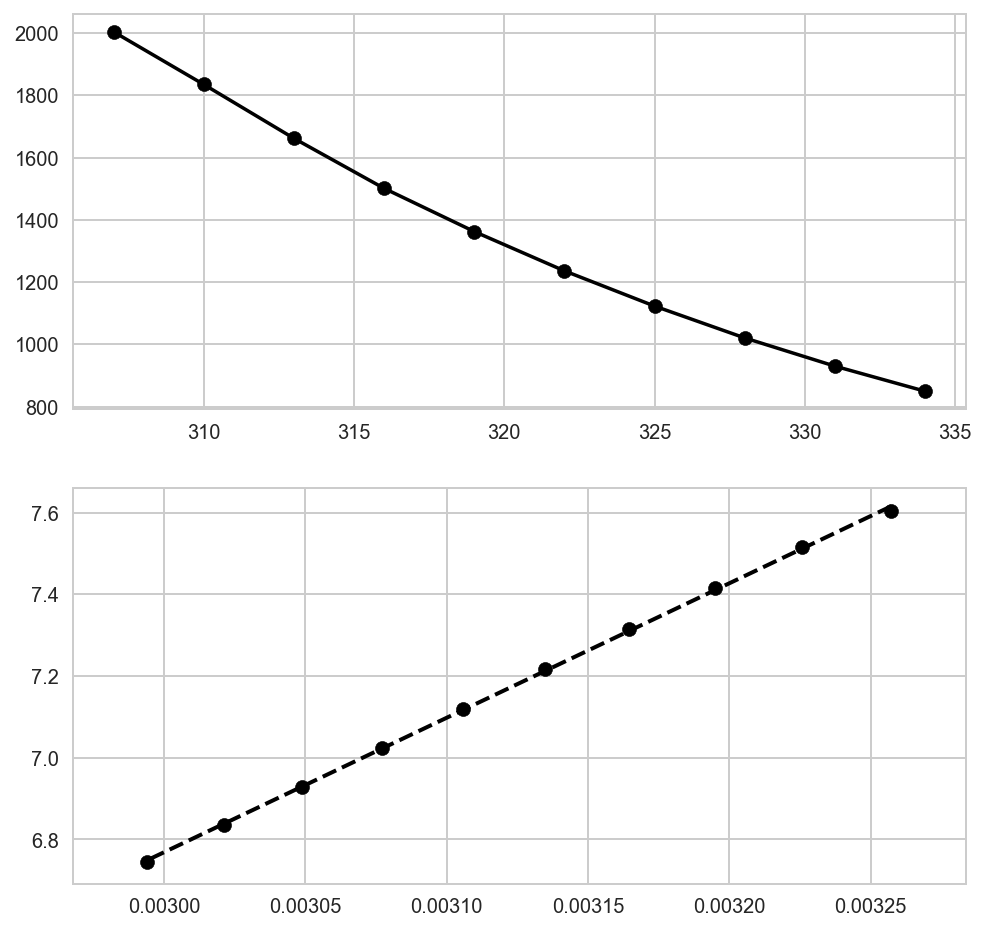

In [8]:
s_data = {
    'Us'   : 1.3, 
    'R1'   : 100, 
    'R2'   : 100, 
    'R3_0' : 2004.0, 
    '_t_l' : make3(34.0), 
    '_U_l' : [0,-5.4,-12,-19.4,-27.1,-35.5,-44.5,-54.2,-64.4,-75.1]
}
s_bridge(**s_data)